In [7]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/train/dyed-lifted-polyps')))
print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/train/dyed-resection-margins')))
print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/train/esophagitis')))
print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/train/normal-cecum')))
print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/train/normal-pylorus')))
print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/train/normal-z-line')))
print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/train/polyps')))
print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/train/ulcerative-colitis')))

print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/test/dyed-lifted-polyps')))
print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/test/dyed-resection-margins')))
print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/test/esophagitis')))
print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/test/normal-cecum')))
print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/test/normal-pylorus')))
print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/test/normal-z-line')))
print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/test/polyps')))
print(len(os.listdir('D:/Project_files/ML/Anomaly detection CNN/test/ulcerative-colitis')))

800
800
800
800
800
800
800
800
200
200
200
200
200
200
200
200


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

W1126 23:35:27.776666 12132 deprecation.py:506] From D:\Anaconda3\envs\JupyterPCII\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1126 23:35:29.412363 12132 deprecation.py:323] From D:\Anaconda3\envs\JupyterPCII\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
TRAINING_DIR = 'D:/Project_files/ML/Anomaly detection CNN/train'

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 6400 images belonging to 8 classes.


In [16]:
VALIDATION_DIR = 'D:/Project_files/ML/Anomaly detection CNN/test'

validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 1600 images belonging to 8 classes.


In [17]:
history = model.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
64/64 [==============================] - 367s 6s/step - loss: -34947270.5226 - acc: 0.1250 - val_loss: -168102530.0000 - val_acc: 0.1250
Epoch 2/15
64/64 [==============================] - 425s 7s/step - loss: -844733500.0000 - acc: 0.1250 - val_loss: -2127574048.0000 - val_acc: 0.1250
Epoch 3/15
64/64 [==============================] - 372s 6s/step - loss: -5309288712.0000 - acc: 0.1250 - val_loss: -10208374656.0000 - val_acc: 0.1250
Epoch 4/15
64/64 [==============================] - 355s 6s/step - loss: -19372087520.0000 - acc: 0.1250 - val_loss: -32200537984.0000 - val_acc: 0.1250
Epoch 5/15
64/64 [==============================] - 280s 4s/step - loss: -52682379424.0000 - acc: 0.1250 - val_loss: -80612441600.0000 - val_acc: 0.1250
Epoch 6/15
64/64 [==============================] - 388s 6s/step - loss: -120591615360.0000 - acc: 0.1250 - val_loss: -173670841344.0000 - val_acc: 0.1250
Epoch 7/15
64/64 [==============================] - 285s 4s/step - loss: -242454481408.00

<Figure size 432x288 with 0 Axes>

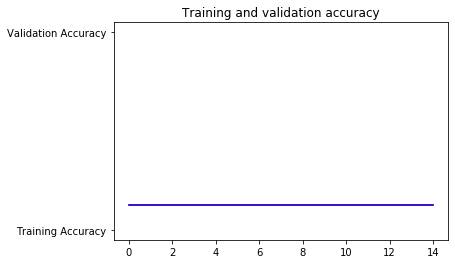

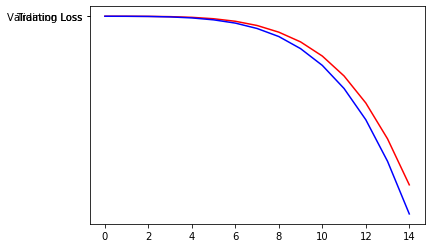

<Figure size 432x288 with 0 Axes>

In [18]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


In [ ]:
s